In [1]:
from sklearn import datasets
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
iris = datasets.load_iris()

In [3]:
X = iris.data[:, [2, 3]]
y = iris.target

In [4]:
X.shape

(150, 2)

In [5]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

/home/quoniam/anaconda2/envs/tensorflow/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [6]:
y_train.shape

(105,)

In [7]:
X_train.shape

(105, 2)

In [8]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
# sc.fit(X_test)
X_test_std = sc.transform(X_test)

In [9]:
X_train_std.shape

(105, 2)

# 预测

In [10]:
from sklearn.linear_model import Perceptron
ppn = Perceptron(n_iter=40, eta0=0.1, random_state=0)
ppn.fit(X_train_std, y_train)

Perceptron(alpha=0.0001, class_weight=None, eta0=0.1, fit_intercept=True,
      n_iter=40, n_jobs=1, penalty=None, random_state=0, shuffle=True,
      verbose=0, warm_start=False)

In [11]:
y_pred = ppn.predict(X_test_std)

from sklearn.metrics import accuracy_score
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.91


In [12]:
import sys
sys.path.append('../commonLib')

# 绘制决策区域

In [13]:
import pdr_sklearn as pdk

In [14]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

In [15]:
y_combined.shape

(150,)

In [16]:
X_combined_std.shape

(150, 2)

绘制测试数据
[[ 0.70793846  1.50872803]
 [ 0.09545238 -0.29145882]
 [-1.35224199 -1.32013702]
 [ 1.37610509  0.73721938]
 [-1.29656144 -1.32013702]
 [ 1.20906343  1.6373128 ]
 [-1.40792255 -1.19155225]
 [ 0.48521625  0.35146505]
 [ 0.5408968   0.22288028]
 [ 0.09545238  0.0942955 ]
 [ 0.98634122  0.22288028]
 [ 0.37385514  0.35146505]
 [ 0.48521625 -0.03428927]
 [ 0.42953569  0.35146505]
 [ 0.48521625  0.22288028]
 [-1.29656144 -1.4487218 ]
 [ 0.37385514  0.35146505]
 [ 0.31817459 -0.03428927]
 [-1.35224199 -1.19155225]
 [-1.40792255 -1.06296747]
 [ 0.59657735  0.99438893]
 [ 0.37385514  0.35146505]
 [-1.07383923 -1.32013702]
 [-1.35224199 -1.32013702]
 [ 0.5408968   0.73721938]
 [-1.57496421 -1.32013702]
 [-1.07383923 -1.06296747]
 [ 0.26249403  0.0942955 ]
 [-0.29431149 -0.29145882]
 [-1.24088089 -1.06296747]
 [ 0.93066067  0.73721938]
 [ 0.37385514  0.35146505]
 [-1.29656144 -1.32013702]
 [ 0.59657735  0.73721938]
 [ 0.98634122  1.25155848]
 [ 0.03977182  0.22288028]
 [-1.18520034 -1.1915

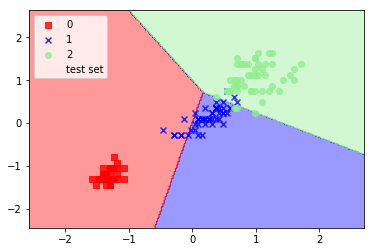

In [17]:
pdk.plot_decision_regions(X=X_combined_std,
                         y=y_combined,
                         classifier=ppn,
                         test_idx=range(105, 150))
plt.legend(loc='upper left')
plt.show()